In [30]:
import numpy as np
import matplotlib.pyplot as plt

   Index      TxnDate   TxnTime  Consumption
0      0  21 Jan 2022  01:57:23        4.632
1      1  21 Jan 2022  06:15:59        6.080
2      2  21 Jan 2022  13:11:00        3.194
3      3  21 Jan 2022  15:22:43        2.038
4      4  21 Jan 2022  22:01:21        7.428
    Index  Consumption
0       0        4.632
1       1        6.080
2       2        3.194
3       3        2.038
4       4        7.428
..    ...          ...
95     95        0.958
96     96        1.840
97     97        0.854
98     98        1.014
99     99        0.940

[100 rows x 2 columns]


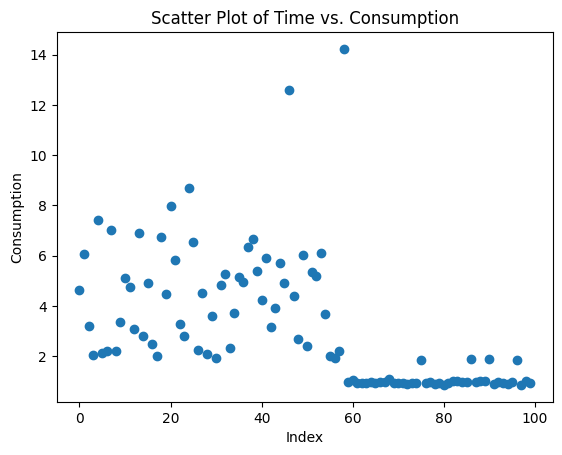

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Consumption.csv', sep=',')


df = df[:100]
print(df.head())


selected_columns = df[['Index', 'Consumption']]
print(selected_columns)

# Convert the DataFrame to a numpy array
xArr = selected_columns[['Index']]
yArr = selected_columns[['Consumption']]

xArr = np.array(xArr).flatten()
yArr = np.array(yArr).flatten()


# Plot the data
plt.scatter(xArr, yArr)
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Scatter Plot of Time vs. Consumption')
plt.show()


In [32]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Read the CSV file
# df = pd.read_csv('Iris.csv', sep=',')


# df = df[:100]
# print(df.head())


# selected_columns = df[['Id', 'SepalLengthCm']]
# print(selected_columns)

# # Convert the DataFrame to a numpy array
# xArr = selected_columns[['Id']]
# yArr = selected_columns[['SepalLengthCm']]

# xArr = np.array(xArr).flatten()
# yArr = np.array(yArr).flatten()


# # Plot the data
# plt.scatter(xArr, yArr)
# plt.xlabel('Id')
# plt.ylabel('SepalLength')
# plt.title('Scatter Plot of Time vs. SepalLength')
# plt.show()


In [33]:
noOfPoints = 100

In [34]:
# xVals = np.linspace(0,10,noOfPoints)

# yVals = 2*np.sin(xVals)/np.cos(xVals/2)
# # yVals = np.cos(xVals) + np.random.normal(0, 0.1, noOfPoints)

# xArr = np.array(xVals)
# # yArr = np.array(yVals)
# xArr

<Figure size 640x480 with 0 Axes>

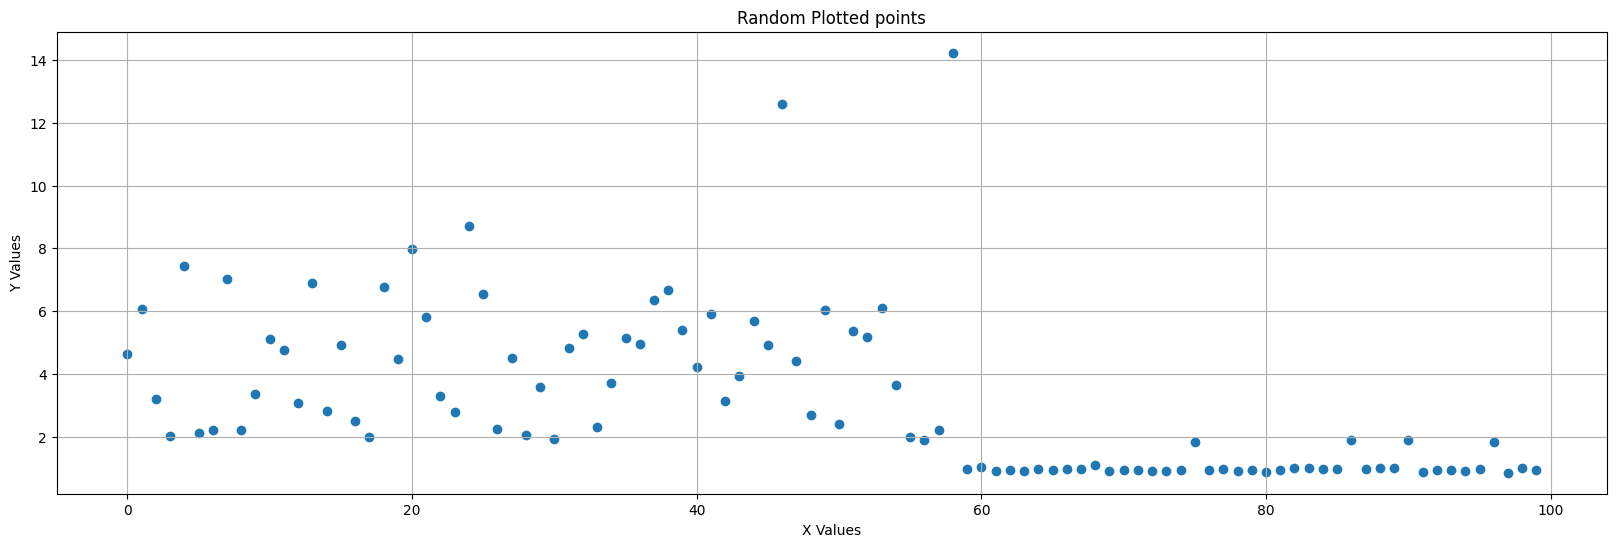

In [35]:
plt.clf()
plt.figure(figsize=(20,6))

plt.scatter(xArr,yArr)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Random Plotted points")

plt.grid(1)


In [36]:
noOfSplines = xArr.size - 1
noOfSplines

99

##### Computing H values, step size

In [37]:


hArr = np.zeros(noOfSplines)

for j in range(0,noOfSplines):
    hArr[j] = xArr[j+1] - xArr[j]
    # plt.plot(xArr[j:j+2],yArr[j:j+2])
print(hArr.shape)

(99,)


#### Computing Alpha Values

In [38]:
alphaArr = np.array(yArr)

#### Computing B Values


In [39]:
bArr = np.zeros(noOfSplines+1)

for i in range (1,noOfSplines):
    bArr[i] = (3/hArr[i])*(alphaArr[i+1]-alphaArr[i])-(3/hArr[i-1])*(alphaArr[i]-alphaArr[i-1])

# print(bArr)

#### Computing A Values

In [40]:
aArr = np.zeros((noOfSplines+1,noOfSplines+1))

# print(aArr)


for i in range (1,noOfSplines):
    aArr[i][i-1]=hArr[i-1]
    aArr[i][i+1]=hArr[i]
    aArr[i][i]=2*(hArr[i-1]+hArr[i])

aArr[0][0] = 1
aArr[-1][-1] = 1
print(aArr)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 4. 1. ... 0. 0. 0.]
 [0. 1. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 4. 1. 0.]
 [0. 0. 0. ... 1. 4. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Computing Gamma 

In [41]:
# gammaArr = np.zeros((noOfSplines+1,noOfSplines+1))

# gammaArr = np.matmul(aArr,bArr)
gammaArr = np.matmul(np.linalg.inv(aArr),bArr)


# print(gammaArr)

##### Computing Beta and Delta

In [42]:
betaArr = np.zeros(noOfSplines)
deltaArr = np.zeros(noOfSplines)

for i in range (0,noOfSplines):
    betaArr[i]=(1/hArr[i])*(alphaArr[i+1]-alphaArr[i])-(hArr[i]/3)*(2*gammaArr[i]+gammaArr[i+1])
    deltaArr[i]=(gammaArr[i+1]-gammaArr[i])/(3*hArr[i])



<Figure size 640x480 with 0 Axes>

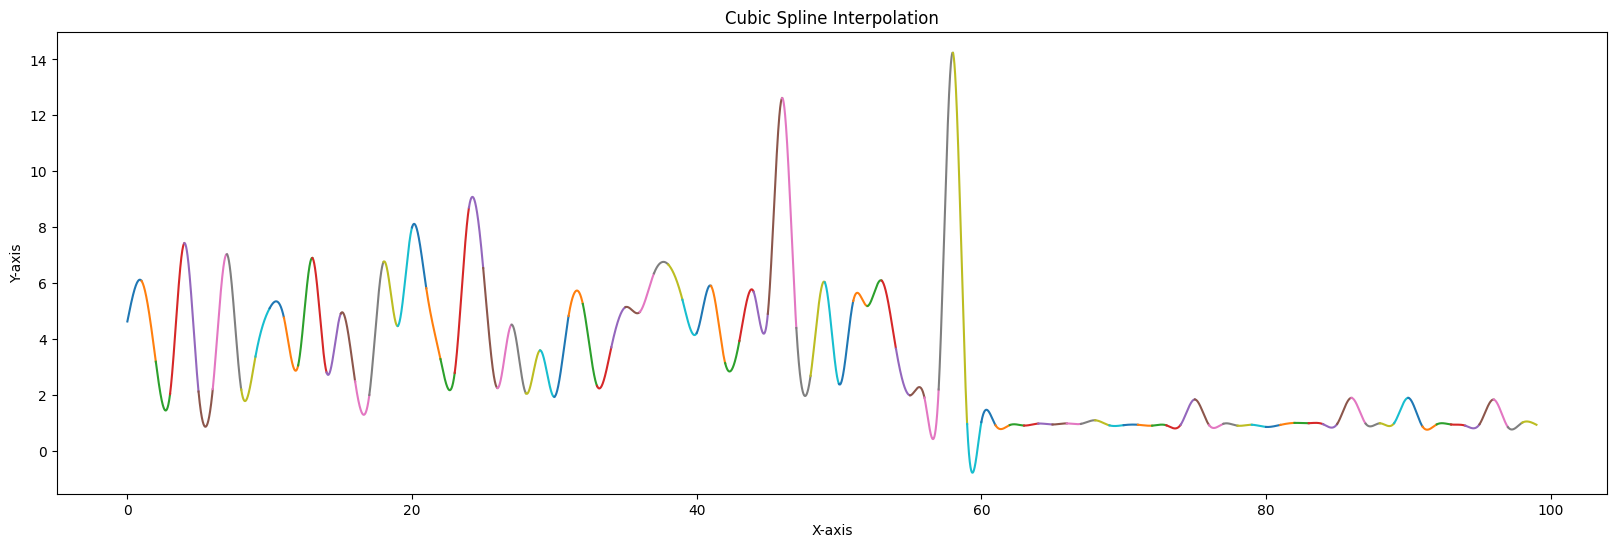

In [43]:
plt.clf()
plt.figure(figsize=(20,6))

for i in range(0, noOfSplines):
    x = np.arange(xArr[i], xArr[i+1] + 0.00005, 0.00005)
    spline_i = alphaArr[i] + betaArr[i]*(x-xArr[i]) + gammaArr[i]*(x-xArr[i])**2 + deltaArr[i]*(x-xArr[i])**3
    plt.plot(x, spline_i)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Spline Interpolation')
plt.show()


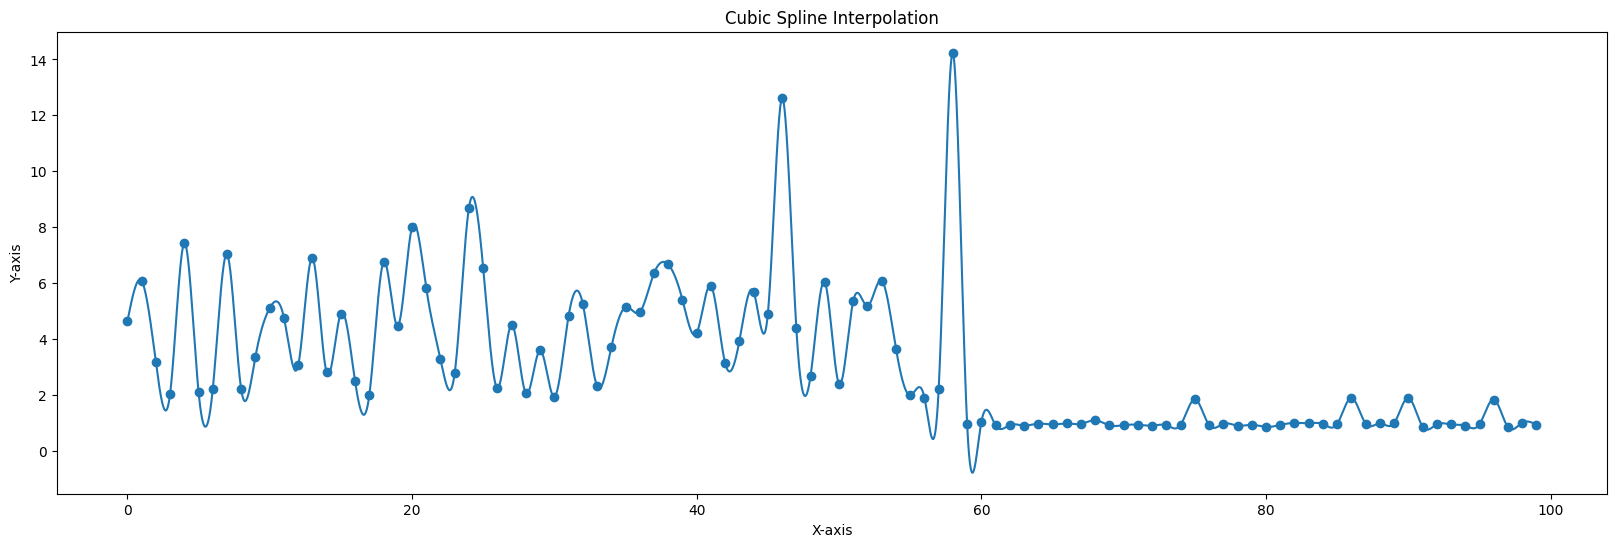

In [44]:
xVALS = []
yVALS = []

plt.figure(figsize=(20, 6))
for i in range(0,noOfSplines):
    x = np.arange(xArr[i], xArr[i+1] + 0.00005, 0.00005)
    spline_i = alphaArr[i] + betaArr[i]*(x-xArr[i]) + gammaArr[i]*(x-xArr[i])**2 + deltaArr[i]*(x-xArr[i])**3
    xVALS.extend(x)
    yVALS.extend(spline_i)
plt.scatter(xArr, yArr, label='Data Points')

plt.plot(xVALS, yVALS)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Spline Interpolation')
plt.show()